<a href="https://colab.research.google.com/github/Jsakkos/mf-lon-cyanos-rvae/blob/main/notebooks/cells_CB_rVAE_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook analyzes the data for set of carboxysomes.

The masks were generated with Cellpose (https://www.cellpose.org/) for the 4, 8, 24, 48, and 72 hours. Those masks were saved in google drive and are downloaded here as the array "subimg". This array is then divided into subimg_1, subimg_2...,subimg_10, where subimg_i, i=1,5 corresponds to the data for the control samples and subimg_i, i=6,10 corresponds to data for the induced samples.

A trained rotationally invariant variational autoencoder, rVAE, is also downloaded here. 

The plots are then generated using the trained rVAE and the subimg_i.

Authors:

Miguel Fuentes-Cabrera, Center for Nanophase Materials Sciences, Oak Ridge National Laboratory

Jonathan Sakkos, Michigan State University


In [ ]:
# Import required packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline
import gdown
from scipy.stats import gaussian_kde
import torch

In [ ]:
#Downloading the array contain all the masks
!gdown "https://drive.google.com/uc?id=1UYO3hKPOIqm7_t36pUo19IYD4Al3Il79"

Downloading...
From: https://drive.google.com/uc?id=1UYO3hKPOIqm7_t36pUo19IYD4Al3Il79
To: /content/set-CB-masks-control-and-induced.npy
100% 5.61G/5.61G [00:37<00:00, 149MB/s]


In [ ]:
subimg = np.load('set-CB-masks-control-and-induced.npy')

In [ ]:
subimg.shape

(52984, 115, 115)

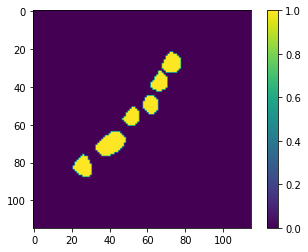

In [ ]:
plt.imshow(subimg[3000,:,:])
plt.colorbar()

In [ ]:
#Dividing the subimg array into the subimg_i, i=1,10

#Control subimages
subimg_1 = subimg[0:4388]
subimg_2 = subimg[4388:11880]
subimg_3 = subimg[11880:19545]
subimg_4 = subimg[19545:22522]
subimg_5 = subimg[22522:29116]

#Induces subimages
subimg_6 = subimg[29116:33275]
subimg_7 = subimg[33275:33803]
subimg_8 = subimg[33803:44128]
subimg_9 = subimg[44128:49003]
subimg_10 = subimg[49003:52984]

In [ ]:
subimg_1.shape, subimg_2.shape, subimg_3.shape, subimg_4.shape, subimg_5.shape, subimg_6.shape, subimg_7.shape, subimg_8.shape, subimg_9.shape, subimg_10.shape

((4388, 115, 115),
 (7492, 115, 115),
 (7665, 115, 115),
 (2977, 115, 115),
 (6594, 115, 115),
 (4159, 115, 115),
 (528, 115, 115),
 (10325, 115, 115),
 (4875, 115, 115),
 (3981, 115, 115))

In [ ]:
pip install atomai

     |████████████████████████████████| 146 kB 5.1 MB/s 
     |████████████████████████████████| 193 kB 46.7 MB/s 
     |████████████████████████████████| 503 kB 30.7 MB/s 
     |████████████████████████████████| 865 kB 38.7 MB/s 
  Created wheel for mendeleev: filename=mendeleev-0.6.1-py2.py3-none-any.whl size=174982 sha256=8cbd9de358cd9fac581a4c3aa60e20cc8e5c8bba2eccf4dc258254c0c2c6435b
  Stored in directory: /root/.cache/pip/wheels/f4/4e/dd/06777c90710ce1766376ecc87979967fe69ff3affc29c0b530
Successfully built mendeleev


In [ ]:
import atomai as aoi

In [ ]:
!gdown "https://drive.google.com/uc?id=1CEmKfgwxdHHQEHJQZ__S4FmFkEP8d1ZI"

Downloading...
From: https://drive.google.com/uc?id=1CEmKfgwxdHHQEHJQZ__S4FmFkEP8d1ZI
To: /content/cell-rvae-iter200-control-and-induced-4-8-24-48-72.tar
100% 28.5M/28.5M [00:00<00:00, 133MB/s] 


In [ ]:
rvae= aoi.models.load_model("cell-rvae-iter200-control-and-induced-4-8-24-48-72.tar")

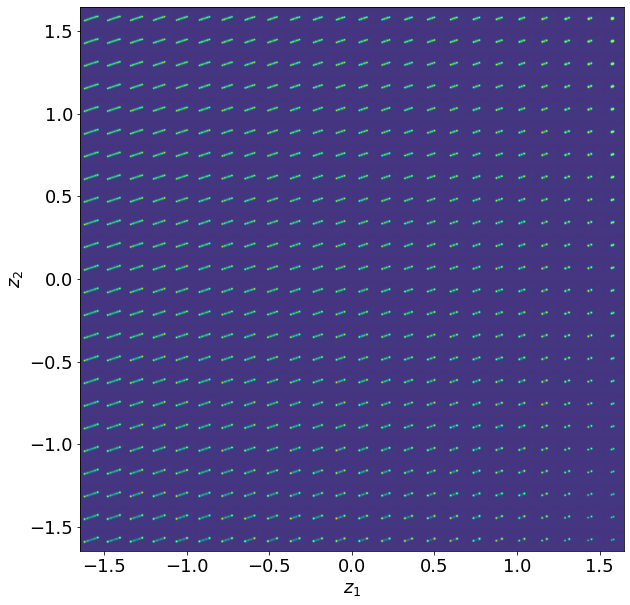

In [ ]:
rvae.manifold2d(d=24, cmap="viridis");

In [ ]:
#Control
a4c, b4c = rvae.encode(subimg_1)
a8c, b8c = rvae.encode(subimg_2)
a24c, b24c = rvae.encode(subimg_3)
a48c, b48c = rvae.encode(subimg_4)
a72c, b72c = rvae.encode(subimg_5)

#Induced
a4i, b4i = rvae.encode(subimg_6)
a8i, b8i = rvae.encode(subimg_7)
a24i, b24i = rvae.encode(subimg_8)
a48i, b48i = rvae.encode(subimg_9)
a72i, b72i = rvae.encode(subimg_10)

-2.0 0.0
-1.0 0.0
0.0 0.0
1.0 0.0
1.5 0.0
2.5 0.0


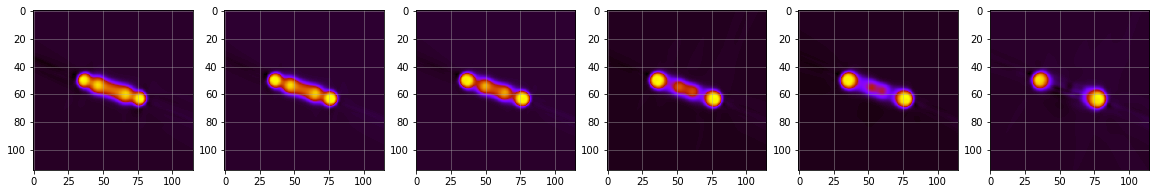

In [ ]:
#Varying L1 and fixing L2
# L1 = 1.7
# L2 = 1.4
lv1_vals = np.linspace(-2,2.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 0 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded1 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])

# L1 = 1.7
# L2 = 1.5
lv1_vals = np.linspace(-1,2.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 0 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded2 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])

# L1 = 1.7
# L2 = 1.6
lv1_vals = np.linspace(0,2.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 0 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded3 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])

# L1 = 1.7
# L2 = 1.7
lv1_vals = np.linspace(1,2.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 0 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded4 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])

# L1 = 1.7
# L2 = 1.9
lv1_vals = np.linspace(1.5,2.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 0 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded5 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])

# L1 = 1.7
# L2 = 2.0
lv1_vals = np.linspace(2.5,2.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 0 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded6 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,6,1)
ax.imshow(decoded1[0], cmap="gnuplot")
# ax.set_title('L1 = 0.5, L2 = 1')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,2)
ax.imshow(decoded2[0], cmap="gnuplot")
# ax.set_title('L1 = 0, L2 = 2')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,3)
ax.imshow(decoded3[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,4)
ax.imshow(decoded4[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,5)
ax.imshow(decoded5[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,6)
ax.imshow(decoded6[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

plt.savefig('Fig8b')

1.7 1.4
1.7 1.5
1.7 1.6
1.7 1.7
1.7 1.9
1.7 2.0


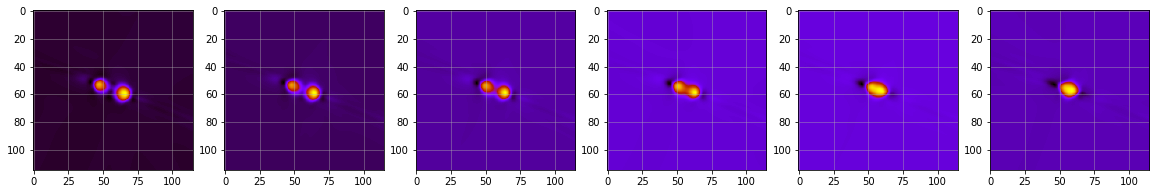

In [ ]:
#Varying L2 and fixing L1
# L1 = 1.7
# L2 = 1.4
lv1_vals = np.linspace(1.7,1.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 1.4 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded1 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])

# L1 = 1.7
# L2 = 1.5
lv1_vals = np.linspace(1.7,1.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 1.5 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded2 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])

# L1 = 1.7
# L2 = 1.6
lv1_vals = np.linspace(1.7,1.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 1.6 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded3 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])

# L1 = 1.7
# L2 = 1.7
lv1_vals = np.linspace(1.7,1.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 1.7 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded4 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])

# L1 = 1.7
# L2 = 1.9
lv1_vals = np.linspace(1.7,1.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 1.9 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded5 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])

# L1 = 1.7
# L2 = 2.0
lv1_vals = np.linspace(1.7,1.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 2.0 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded6 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,6,1)
ax.imshow(decoded1[0], cmap="gnuplot")
# ax.set_title('L1 = 0.5, L2 = 1')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,2)
ax.imshow(decoded2[0], cmap="gnuplot")
# ax.set_title('L1 = 0, L2 = 2')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,3)
ax.imshow(decoded3[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,4)
ax.imshow(decoded4[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,5)
ax.imshow(decoded5[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,6)
ax.imshow(decoded6[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

plt.savefig('Fig8c')

In [ ]:
#L1 histogram
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2,5,1)
ax.set_title('4 control', fontsize=25) 
ax.hist(a4c[:,3], bins = 50, density = True, stacked = True);
# ax.set_xlabel('L1',fontsize=20)
ax.set_ylabel('Count',fontsize=20)
ax.set_xlim([-4, 4])
ax.set_ylim([0, .8])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,2)
ax.set_title('8 control', fontsize=25) 
ax.hist(a8c[:,3], bins = 50, density = True, stacked = True);
# ax.set_xlabel('L1',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, .8])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,3)
ax.set_title('24 control',fontsize=25) 
ax.hist(a24c[:,3], bins = 50, density = True, stacked = True);
# ax.set_xlabel('L1',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, .8])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,4)
ax.set_title('48 control',fontsize=25) 
ax.hist(a48c[:,3], bins = 50, density = True, stacked = True);
# ax.set_xlabel('L1',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, .8])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,5)
ax.set_title('72 control',fontsize=25) 
ax.hist(a72c[:,3], bins = 50, density = True, stacked = True);
# ax.set_xlabel('L1',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, .8])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.tight_layout(pad=3.0)

#Induced
# fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2,5,6)
ax.set_title('4 induced', fontsize=25) 
ax.hist(a4i[:,3], bins = 50, density = True, stacked = True);
ax.set_xlabel('L1',fontsize=20)
ax.set_ylabel('Count',fontsize=20)
ax.set_xlim([-4, 4])
ax.set_ylim([0, .8])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,7)
ax.set_title('8 induced', fontsize=25) 
ax.hist(a8i[:,3], bins = 50, density = True, stacked = True);
ax.set_xlabel('L1',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, .8])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,8)
ax.set_title('24 induced',fontsize=25) 
ax.hist(a24i[:,3], bins = 50, density = True, stacked = True);
ax.set_xlabel('L1',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, .8])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,9)
ax.set_title('48 induced',fontsize=25) 
ax.hist(a48i[:,3], bins = 50, density = True, stacked = True);
ax.set_xlabel('L1',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, .8])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,10)
ax.set_title('72 induced',fontsize=25) 
ax.hist(a72i[:,3], bins = 50, density = True, stacked = True);
ax.set_xlabel('L1',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4,4])
ax.set_ylim([0, 0.8])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.tight_layout(pad=3.0)

plt.savefig('cell-all-HistogramL1')

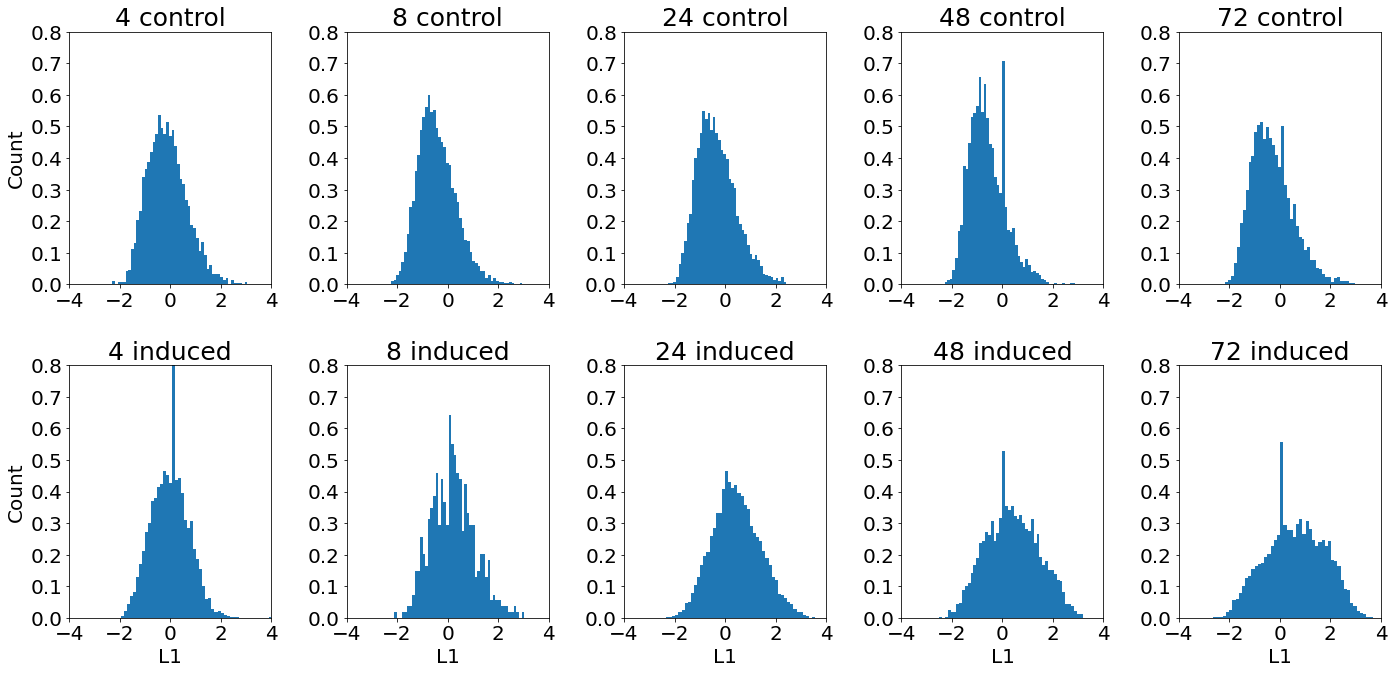

In [ ]:
#L1 histogram

#Control
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2,5,1)
ax.set_title('4 control', fontsize=25) 
ax.hist(a4c[:,3], bins = 50, density = True, stacked = True);
# ax.set_xlabel('L1',fontsize=20)
ax.set_ylabel('Count',fontsize=20)
ax.set_xlim([-4, 4])
ax.set_ylim([0, .8])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,2)
ax.set_title('8 control', fontsize=25) 
ax.hist(a8c[:,3], bins = 50, density = True, stacked = True);
# ax.set_xlabel('L1',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, .8])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,3)
ax.set_title('24 control',fontsize=25) 
ax.hist(a24c[:,3], bins = 50, density = True, stacked = True);
# ax.set_xlabel('L1',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, .8])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,4)
ax.set_title('48 control',fontsize=25) 
ax.hist(a48c[:,3], bins = 50, density = True, stacked = True);
# ax.set_xlabel('L1',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, .8])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,5)
ax.set_title('72 control',fontsize=25) 
ax.hist(a72c[:,3], bins = 50, density = True, stacked = True);
# ax.set_xlabel('L1',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, .8])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.tight_layout(pad=3.0)

#Induced
# fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2,5,6)
ax.set_title('4 induced', fontsize=25) 
ax.hist(a4i[:,3], bins = 50, density = True, stacked = True);
ax.set_xlabel('L1',fontsize=20)
ax.set_ylabel('Count',fontsize=20)
ax.set_xlim([-4, 4])
ax.set_ylim([0, .8])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,7)
ax.set_title('8 induced', fontsize=25) 
ax.hist(a8i[:,3], bins = 50, density = True, stacked = True);
ax.set_xlabel('L1',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, .8])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,8)
ax.set_title('24 induced',fontsize=25) 
ax.hist(a24i[:,3], bins = 50, density = True, stacked = True);
ax.set_xlabel('L1',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, .8])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,9)
ax.set_title('48 induced',fontsize=25) 
ax.hist(a48i[:,3], bins = 50, density = True, stacked = True);
ax.set_xlabel('L1',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, .8])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,10)
ax.set_title('72 induced',fontsize=25) 
ax.hist(a72i[:,3], bins = 50, density = True, stacked = True);
ax.set_xlabel('L1',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4,4])
ax.set_ylim([0, 0.8])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.tight_layout(pad=3.0)

plt.savefig('Fig9')

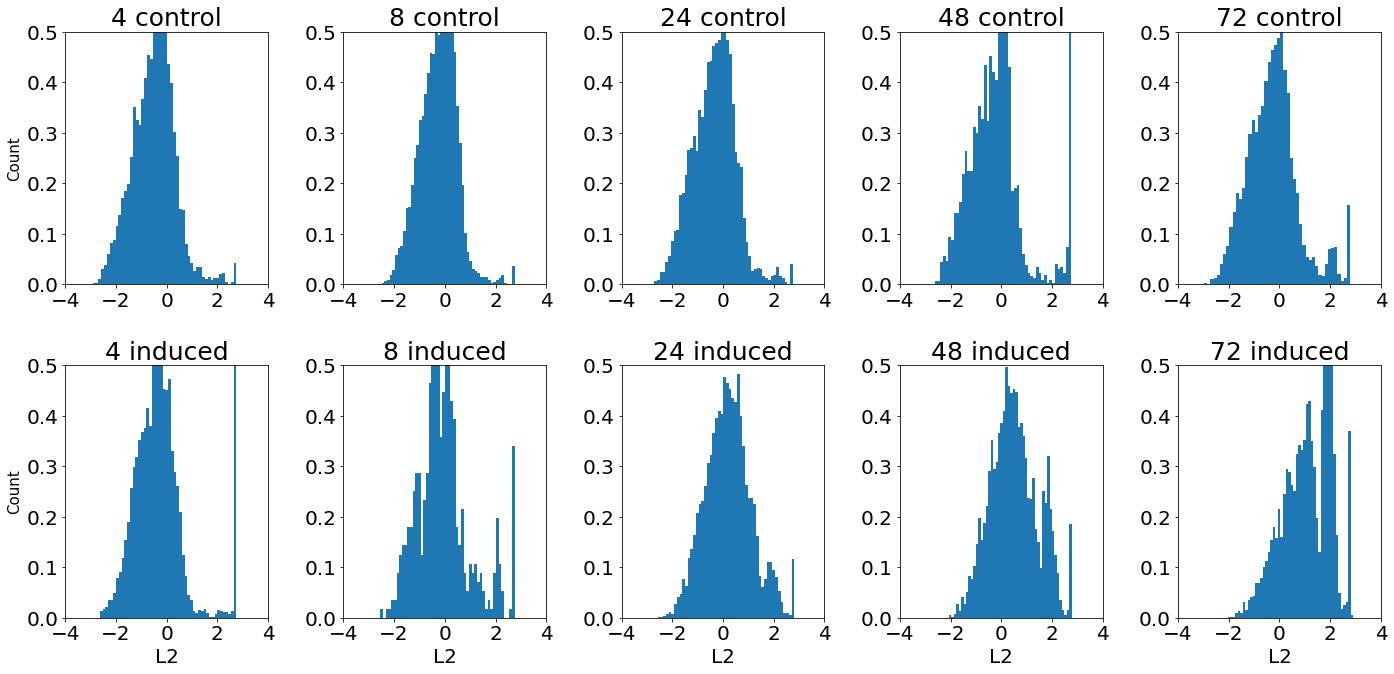

In [ ]:
#L2 histogram

#Control
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2,5,1)
ax.set_title('4 control',fontsize=25) 
ax.hist(a4c[:,4], bins = 50, density = True, stacked = True);
# ax.set_xlabel('L2',fontsize=20)
ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, 0.5])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,2)
ax.set_title('8 control',fontsize=25) 
ax.hist(a8c[:,4], bins = 50, density = True, stacked = True);
# ax.set_xlabel('L2',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, 0.5])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,3)
ax.set_title('24 control',fontsize=25) 
ax.hist(a24c[:,4], bins = 50, density = True, stacked = True);
# ax.set_xlabel('L2',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, 0.5])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,4)
ax.set_title('48 control',fontsize=25) 
ax.hist(a48c[:,4], bins = 50, density = True, stacked = True);
# ax.set_xlabel('L2',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, 0.5])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,5)
ax.set_title('72 control',fontsize=25) 
ax.hist(a72c[:,4], bins = 50, density = True, stacked = True);
# ax.set_xlabel('L2',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, 0.5])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.tight_layout(pad=3.0)

#Induced
# fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2,5,6)
ax.set_title('4 induced',fontsize=25) 
ax.hist(a4i[:,4], bins = 50, density = True, stacked = True);
ax.set_xlabel('L2',fontsize=20)
ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, 0.5])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,7)
ax.set_title('8 induced',fontsize=25) 
ax.hist(a8i[:,4], bins = 50, density = True, stacked = True);
ax.set_xlabel('L2',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, 0.5])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,8)
ax.set_title('24 induced',fontsize=25) 
ax.hist(a24i[:,4], bins = 50, density = True, stacked = True);
ax.set_xlabel('L2',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, 0.5])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,9)
ax.set_title('48 induced',fontsize=25) 
ax.hist(a48i[:,4], bins = 50, density = True, stacked = True);
ax.set_xlabel('L2',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, 0.5])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,10)
ax.set_title('72 induced',fontsize=25) 
ax.hist(a72i[:,4], bins = 50, density = True, stacked = True);
ax.set_xlabel('L2',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([0, 0.5])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.tight_layout(pad=3.0)

plt.savefig('Fig10')

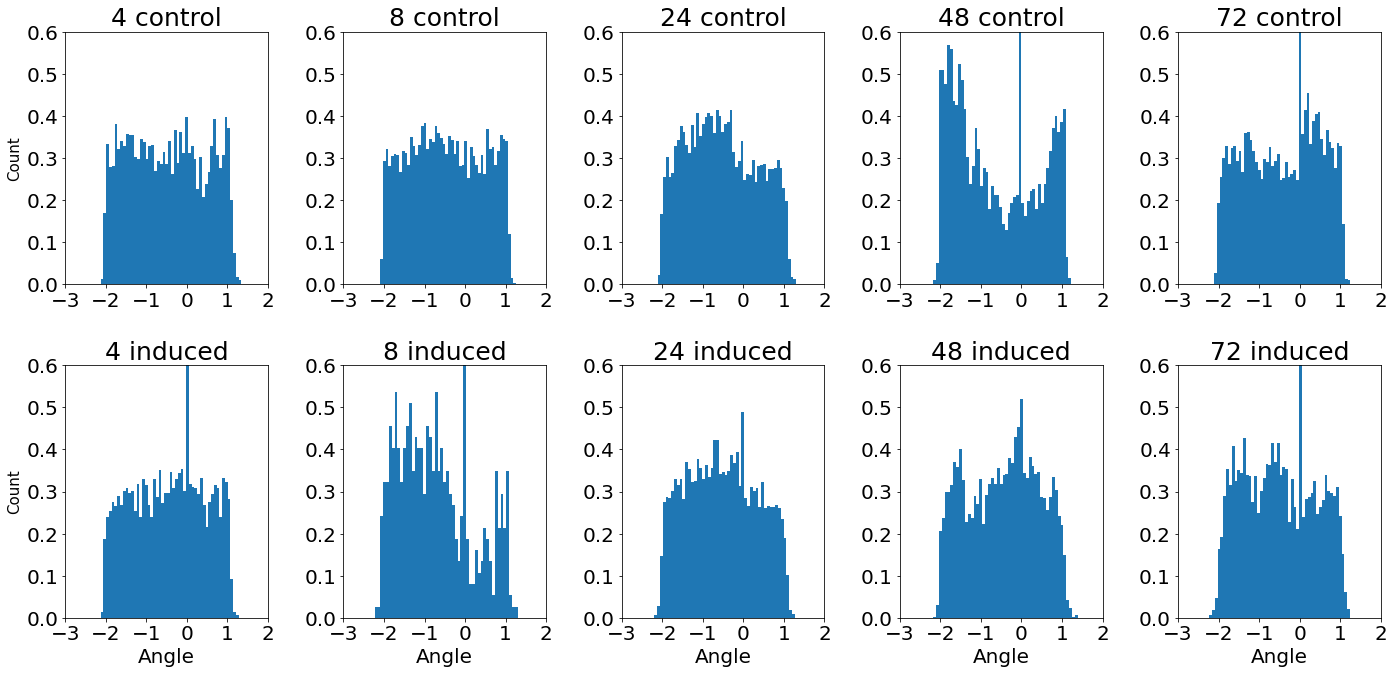

In [ ]:
#Angle histogram

#Control
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2,5,1)
ax.set_title('4 control',fontsize=25) 
ax.hist(a4c[:,0], bins = 50, density = True, stacked = True);
# ax.set_xlabel('Angle',fontsize=20)
ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([0, 0.6])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,2)
ax.set_title('8 control',fontsize=25) 
ax.hist(a8c[:,0], bins = 50, density = True, stacked = True);
# ax.set_xlabel('Angle',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([0, 0.6])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,3)
ax.set_title('24 control',fontsize=25) 
ax.hist(a24c[:,0], bins = 50, density = True, stacked = True);
# ax.set_xlabel('Angle',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([0, 0.6])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,4)
ax.set_title('48 control',fontsize=25) 
ax.hist(a48c[:,0], bins = 50, density = True, stacked = True);
# ax.set_xlabel('Angle',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([0, 0.6])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,5)
ax.set_title('72 control',fontsize=25) 
ax.hist(a72c[:,0], bins = 50, density = True, stacked = True);
# ax.set_xlabel('Angle',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([0, 0.6])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.tight_layout(pad=3.0)

#Induced
# fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2,5,6)
ax.set_title('4 induced',fontsize=25) 
ax.hist(a4i[:,0], bins = 50, density = True, stacked = True);
ax.set_xlabel('Angle',fontsize=20)
ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([0, 0.6])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,7)
ax.set_title('8 induced',fontsize=25) 
ax.hist(a8i[:,0], bins = 50, density = True, stacked = True);
ax.set_xlabel('Angle',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([0, 0.6])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,8)
ax.set_title('24 induced',fontsize=25) 
ax.hist(a24i[:,0], bins = 50, density = True, stacked = True);
ax.set_xlabel('Angle',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([0, 0.6])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,9)
ax.set_title('48 induced',fontsize=25) 
ax.hist(a48i[:,0], bins = 50, density = True, stacked = True);
ax.set_xlabel('Angle',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([0, 0.6])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,10)
ax.set_title('72 induced',fontsize=25) 
ax.hist(a72i[:,0], bins = 50, density = True, stacked = True);
ax.set_xlabel('Angle',fontsize=20)
# ax.set_ylabel('Count',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([0, 0.6])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.tight_layout(pad=3.0)

plt.savefig('Fig11')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: MatplotlibDeprecationWarning: Using a string of single character colo

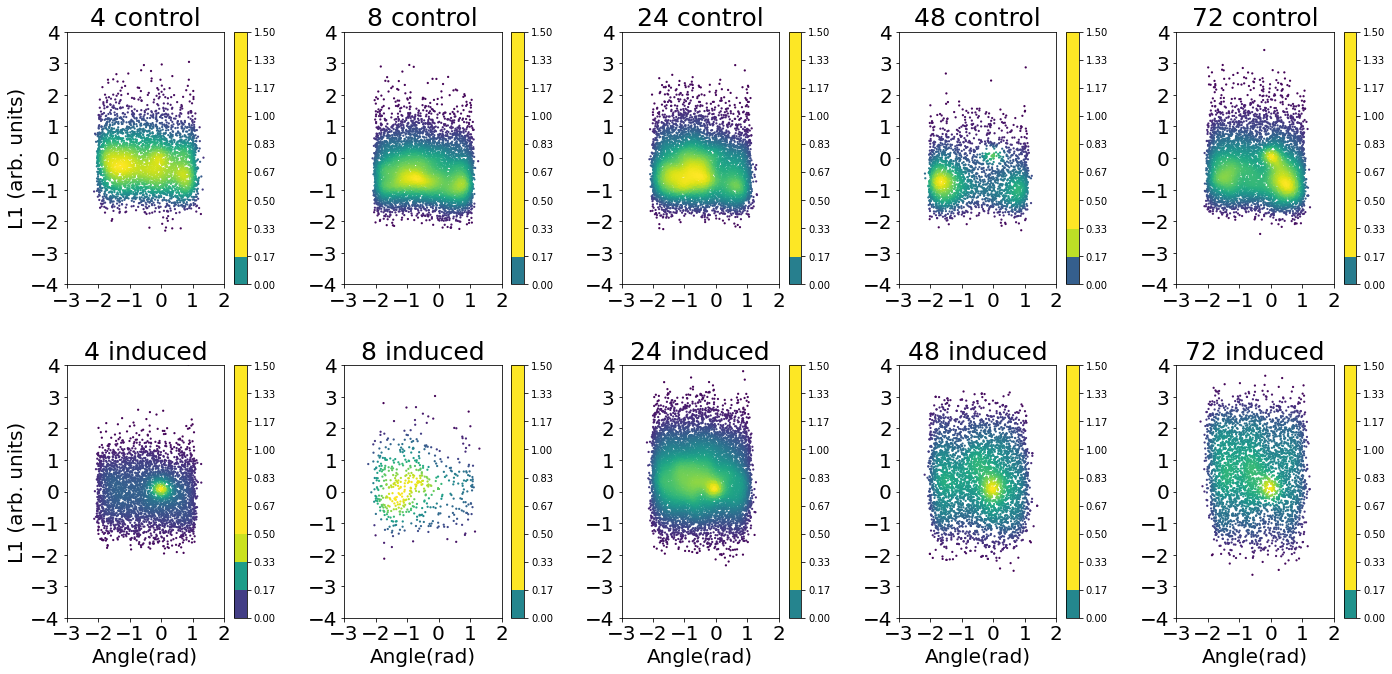

In [ ]:
#Joint distribution L1-Angle

#Control
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2,5,1)
x = a4c[:,0]
y = a4c[:,3]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('4 control',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
# ax.set_xlabel('Angle(rad)',fontsize=20)
ax.set_ylabel('L1 (arb. units)',fontsize=20)
ax.set_xlim([-3, 2])
ax.set_ylim([-4, 4])
# ax.set_clim(0,2)
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
# plt.clim(0,2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


ax = fig.add_subplot(2,5,2)
x = a8c[:,0]
y = a8c[:,3]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('8 control',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
# ax.set_xlabel('Angle(rad)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,3)
x = a24c[:,0]
y = a24c[:,3]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('24 control',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
# ax.set_xlabel('Angle(rad)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,4)
x = a48c[:,0]
y = a48c[:,3]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('48 control',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
# ax.set_xlabel('Angle(rad)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,5)
x = a72c[:,0]
y = a72c[:,3]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('72 control',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
# ax.set_xlabel('Angle(rad)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.tight_layout(pad=3.0)

#Induced
# fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2,5,6)
x = a4i[:,0]
y = a4i[:,3]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('4 induced',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
ax.set_xlabel('Angle(rad)',fontsize=20)
ax.set_ylabel('L1 (arb. units)',fontsize=20)
ax.set_xlim([-3, 2])
ax.set_ylim([-4, 4])
# ax.set_clim(0,2)
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
# plt.clim(0,2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


ax = fig.add_subplot(2,5,7)
x = a8i[:,0]
y = a8i[:,3]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('8 induced',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
ax.set_xlabel('Angle(rad)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,8)
x = a24i[:,0]
y = a24i[:,3]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('24 induced',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
ax.set_xlabel('Angle(rad)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,9)
x = a48i[:,0]
y = a48i[:,3]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('48 induced',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
ax.set_xlabel('Angle(rad)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,10)
x = a72i[:,0]
y = a72i[:,3]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('72 induced',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
ax.set_xlabel('Angle(rad)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.tight_layout(pad=3.0)

plt.savefig('cell-all-L1vsAngle')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: MatplotlibDeprecationWarning: Using a string of single character colo

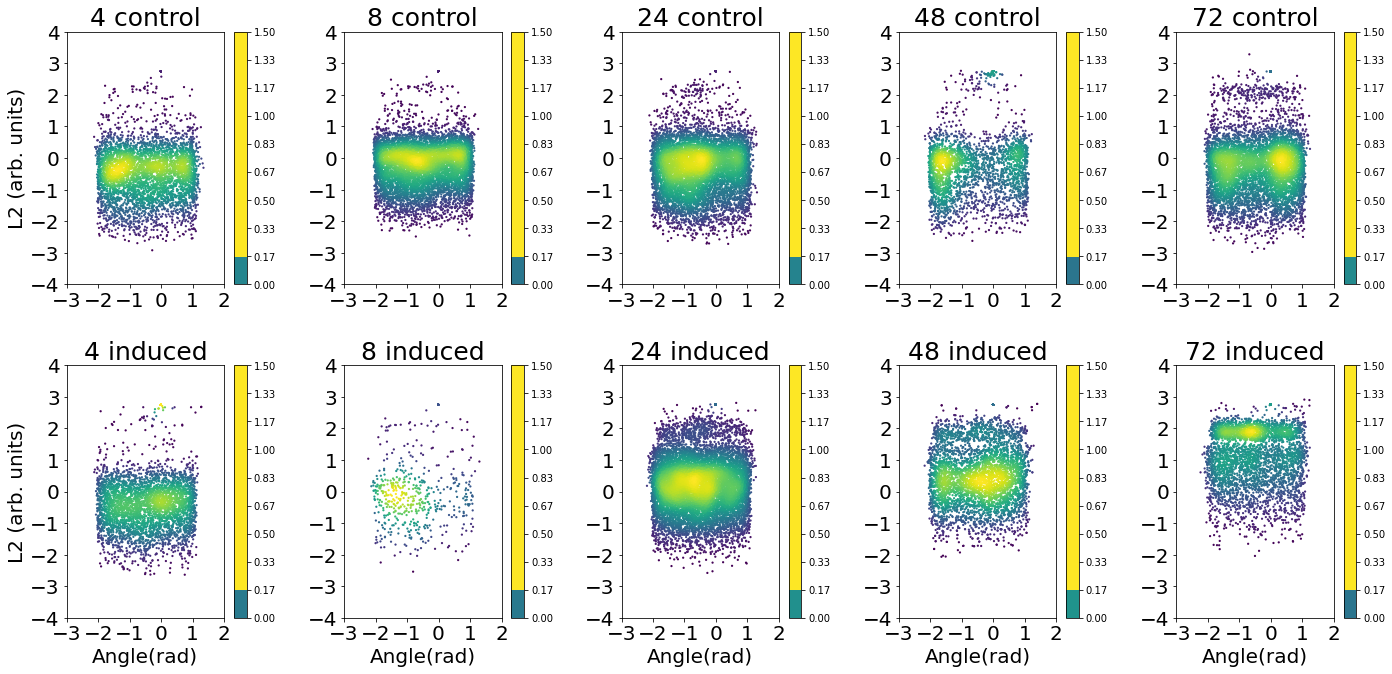

In [ ]:
#Joint distribution L2-Angle


fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2,5,1)
x = a4c[:,0]
y = a4c[:,4]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('4 control',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
# ax.set_xlabel('Angle(rad)',fontsize=20)
ax.set_ylabel('L2 (arb. units)',fontsize=20)
ax.set_xlim([-3, 2])
ax.set_ylim([-4, 4])
# ax.set_clim(0,2)
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
# plt.clim(0,2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


ax = fig.add_subplot(2,5,2)
x = a8c[:,0]
y = a8c[:,4]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('8 control',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
# ax.set_xlabel('Angle(rad)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,3)
x = a24c[:,0]
y = a24c[:,4]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('24 control',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
# ax.set_xlabel('Angle(rad)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,4)
x = a48c[:,0]
y = a48c[:,4]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('48 control',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
# ax.set_xlabel('Angle(rad)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,5)
x = a72c[:,0]
y = a72c[:,4]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('72 control',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
# ax.set_xlabel('Angle(rad)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.tight_layout(pad=3.0)

#Induced
# fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2,5,6)
x = a4i[:,0]
y = a4i[:,4]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('4 induced',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
ax.set_xlabel('Angle(rad)',fontsize=20)
ax.set_ylabel('L2 (arb. units)',fontsize=20)
ax.set_xlim([-3, 2])
ax.set_ylim([-4, 4])
# ax.set_clim(0,2)
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
# plt.clim(0,2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


ax = fig.add_subplot(2,5,7)
x = a8i[:,0]
y = a8i[:,4]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('8 induced',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
ax.set_xlabel('Angle(rad)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,8)
x = a24i[:,0]
y = a24i[:,4]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('24 induced',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
ax.set_xlabel('Angle(rad)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,9)
x = a48i[:,0]
y = a48i[:,4]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('48 induced',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
ax.set_xlabel('Angle(rad)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,10)
x = a72i[:,0]
y = a72i[:,4]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('72 induced',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
ax.set_xlabel('Angle(rad)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-3, 2])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.tight_layout(pad=3.0)

plt.savefig('cell-all-L2vsAngle')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: MatplotlibDeprecationWarning: Using a string of single character colo

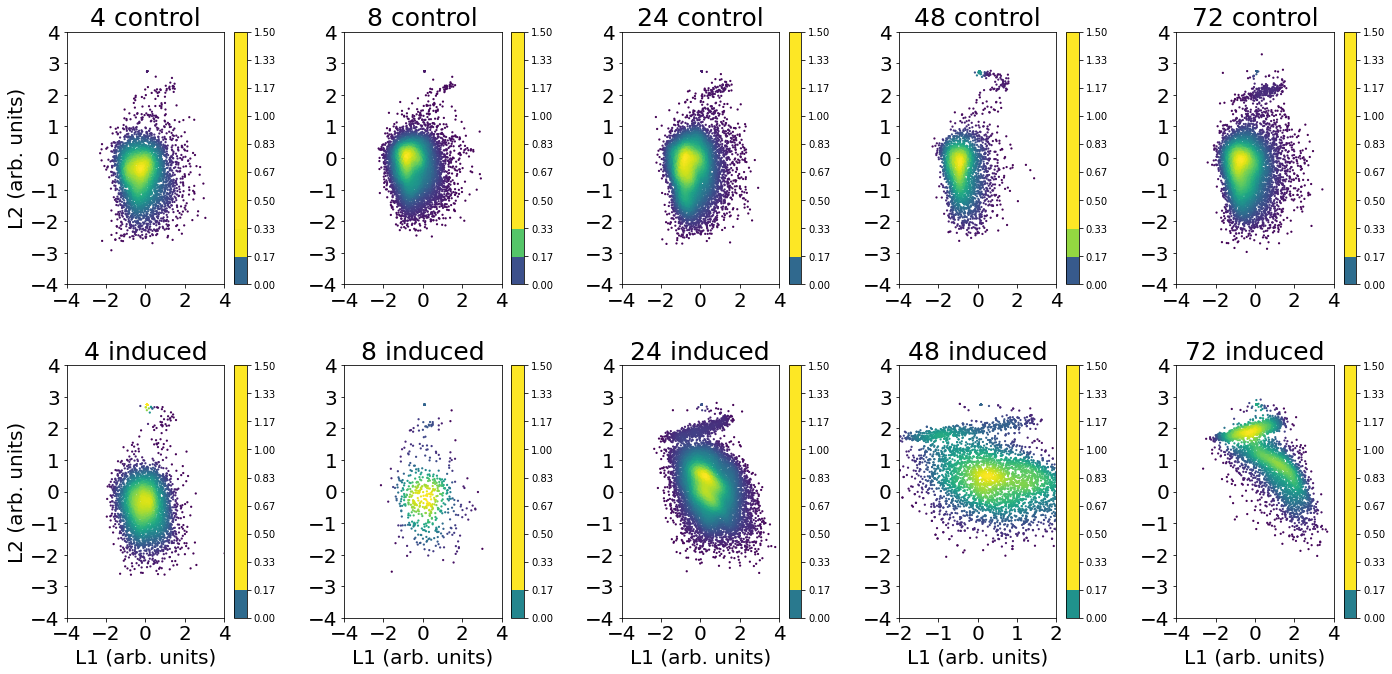

In [ ]:
#Joint distribution L1-L2

#Control
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2,5,1)
x = a4c[:,3]
y = a4c[:,4]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('4 control',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
# ax.set_xlabel('Angle(rad)',fontsize=20)
ax.set_ylabel('L2 (arb. units)',fontsize=20)
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
# ax.set_clim(0,2)
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
# plt.clim(0,2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


ax = fig.add_subplot(2,5,2)
x = a8c[:,3]
y = a8c[:,4]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('8 control',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
# ax.set_xlabel('Angle(rad)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,3)
x = a24c[:,3]
y = a24c[:,4]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('24 control',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
# ax.set_xlabel('Angle(rad)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,4)
x = a48c[:,3]
y = a48c[:,4]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('48 control',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
# ax.set_xlabel('Angle(rad)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,5)
x = a72c[:,3]
y = a72c[:,4]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('72 control',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
# ax.set_xlabel('Angle(rad)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.tight_layout(pad=3.0)

#Induced
# fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2,5,6)
x = a4i[:,3]
y = a4i[:,4]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('4 induced',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
ax.set_xlabel('L1 (arb. units)',fontsize=20)
ax.set_ylabel('L2 (arb. units)',fontsize=20)
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
# ax.set_clim(0,2)
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
# plt.clim(0,2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


ax = fig.add_subplot(2,5,7)
x = a8i[:,3]
y = a8i[:,4]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('8 induced',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
ax.set_xlabel('L1 (arb. units)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,8)
x = a24i[:,3]
y = a24i[:,4]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('24 induced',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
ax.set_xlabel('L1 (arb. units)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,9)
x = a48i[:,3]
y = a48i[:,4]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('48 induced',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
ax.set_xlabel('L1 (arb. units)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-2, 2])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(2,5,10)
x = a72i[:,3]
y = a72i[:,4]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.set_title('72 induced',fontsize=25) 
sc=ax.scatter(x, y, c=z, s=5, edgecolor='')
ax.set_xlabel('L1 (arb. units)',fontsize=20)
# ax.set_ylabel('L1 (arb. units)',fontsize=15)
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
plt.colorbar(sc,boundaries=np.linspace(0,1.5,10),format='%.2f')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.tight_layout(pad=3.0)

plt.savefig('Fig13')

-2.0 0.0
-1.0 0.0
0.0 0.0
1.0 0.0
1.5 0.0
2.5 0.0


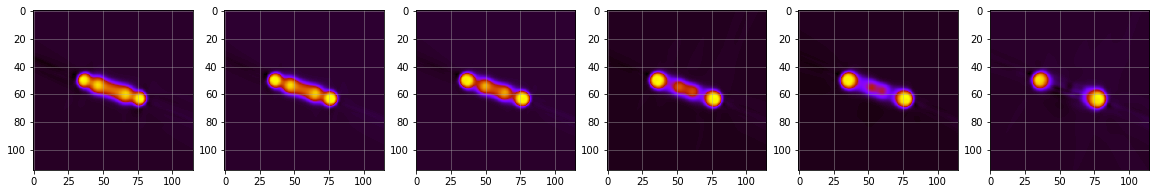

In [ ]:
#Decoding images in regions of interest I

#L1 = -2, -1, 0, 1, 1.5, 2.5; L2 =0

# L1 = 1.7
# L2 = 1.4
lv1_vals = np.linspace(-2,2.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 0 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded1 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])

# L1 = 1.7
# L2 = 1.5
lv1_vals = np.linspace(-1,2.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 0 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded2 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])

# L1 = 1.7
# L2 = 1.6
lv1_vals = np.linspace(0,2.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 0 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded3 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])

# L1 = 1.7
# L2 = 1.7
lv1_vals = np.linspace(1,2.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 0 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded4 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])

# L1 = 1.7
# L2 = 1.9
lv1_vals = np.linspace(1.5,2.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 0 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded5 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])

# L1 = 1.7
# L2 = 2.0
lv1_vals = np.linspace(2.5,2.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 0 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded6 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,6,1)
ax.imshow(decoded1[0], cmap="gnuplot")
# ax.set_title('L1 = 0.5, L2 = 1')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,2)
ax.imshow(decoded2[0], cmap="gnuplot")
# ax.set_title('L1 = 0, L2 = 2')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,3)
ax.imshow(decoded3[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,4)
ax.imshow(decoded4[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,5)
ax.imshow(decoded5[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,6)
ax.imshow(decoded6[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

plt.savefig('Fig14a')

-2.0 1.0
-1.0 1.0
0.0 1.0
1.0 1.0
1.5 1.0
2.5 1.0


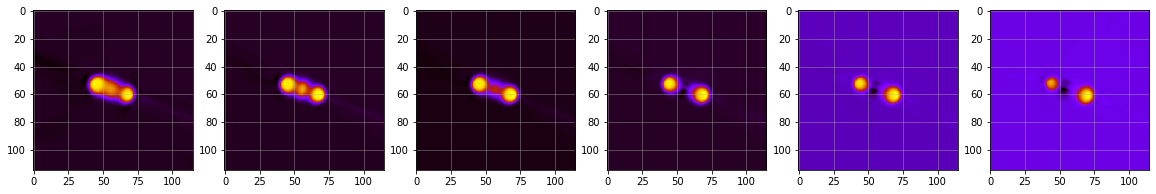

In [ ]:
#Decoding images in regions of interest II

#L1 = -2, -1, 0, 1, 1.5, 2.5; L2 =1


lv1_vals = np.linspace(-2,2.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 1 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded1 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])


lv1_vals = np.linspace(-1,2.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 1 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded2 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])


lv1_vals = np.linspace(0,2.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 1 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded3 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])


lv1_vals = np.linspace(1,2.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 1 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded4 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])


lv1_vals = np.linspace(1.5,2.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 1 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded5 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])


lv1_vals = np.linspace(2.5,2.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 1 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded6 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,6,1)
ax.imshow(decoded1[0], cmap="gnuplot")
# ax.set_title('L1 = 0.5, L2 = 1')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,2)
ax.imshow(decoded2[0], cmap="gnuplot")
# ax.set_title('L1 = 0, L2 = 2')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,3)
ax.imshow(decoded3[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,4)
ax.imshow(decoded4[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,5)
ax.imshow(decoded5[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,6)
ax.imshow(decoded6[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

plt.savefig('Fig14b')

-1.7 1.4
-1.7 1.5
-1.7 1.6
-1.7 1.7
-1.7 1.9
-1.7 2.0


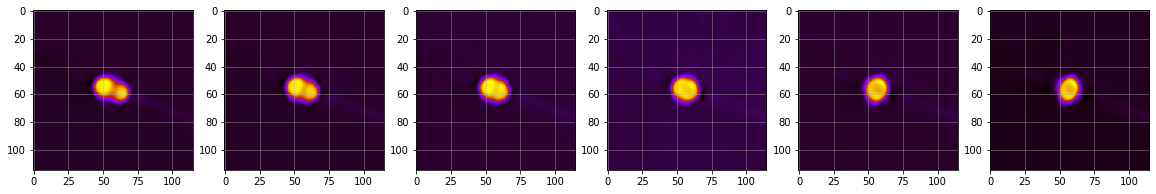

In [ ]:
#Decoding images in regions of interest III

#L1 = -1.7; L2 = 1.4, 1.5, 1.6, 1.7, 1.9, 2.0


lv1_vals = np.linspace(-1.7,1.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 1.4 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded1 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])


lv1_vals = np.linspace(-1.7,1.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 1.5 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded2 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])


lv1_vals = np.linspace(-1.7,1.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 1.6 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded3 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])


lv1_vals = np.linspace(-1.7,1.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 1.7 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded4 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])


lv1_vals = np.linspace(-1.7,1.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 1.9 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded5 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])


lv1_vals = np.linspace(-1.7,1.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 2.0 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded6 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,6,1)
ax.imshow(decoded1[0], cmap="gnuplot")
# ax.set_title('L1 = 0.5, L2 = 1')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,2)
ax.imshow(decoded2[0], cmap="gnuplot")
# ax.set_title('L1 = 0, L2 = 2')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,3)
ax.imshow(decoded3[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,4)
ax.imshow(decoded4[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,5)
ax.imshow(decoded5[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,6)
ax.imshow(decoded6[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

plt.savefig('Fig14c')

0.0 1.4
0.0 1.5
0.0 1.6
0.0 1.7
0.0 1.9
0.0 2.0


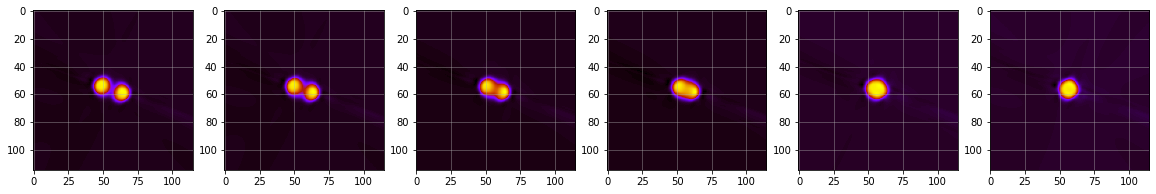

In [ ]:
#Decoding images in regions of interest IV

#L1 = 0; L2 = 1.4, 1.5, 1.6, 1.7, 1.9, 2.0


lv1_vals = np.linspace(0,1.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 1.4 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded1 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])


lv1_vals = np.linspace(0,1.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 1.5 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded2 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])


lv1_vals = np.linspace(0,1.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 1.6 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded3 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])


lv1_vals = np.linspace(0,1.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 1.7 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded4 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])


lv1_vals = np.linspace(0,1.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 1.9 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded5 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])


lv1_vals = np.linspace(0,1.8,1)
lv2_vals = np.zeros_like(lv1_vals)
lv2_vals = 2.0 + lv2_vals
lv_vals = lv_vals = np.concatenate((lv1_vals[:, None], lv2_vals[:, None]), axis=-1)
decoded6 = rvae.decode(lv_vals)
print(lv1_vals[0],lv2_vals[0])

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,6,1)
ax.imshow(decoded1[0], cmap="gnuplot")
# ax.set_title('L1 = 0.5, L2 = 1')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,2)
ax.imshow(decoded2[0], cmap="gnuplot")
# ax.set_title('L1 = 0, L2 = 2')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,3)
ax.imshow(decoded3[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,4)
ax.imshow(decoded4[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,5)
ax.imshow(decoded5[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

ax = fig.add_subplot(1,6,6)
ax.imshow(decoded6[0], cmap="gnuplot")
# ax.set_title('L1 = -1, L2 = 0')
# ax.set_xlim(0,35)
ax.grid(alpha = 0.5)

plt.savefig('Fig14d')